# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [98]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

<h1>Dataset Analysis<h1>

<h4>Quick look at the data<h4>

In [99]:
portfolio.head()

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [100]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [101]:
transcript.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

<h4>Portfolio dataset (Prepare & Analysis)<h4>

For making it easier to understanding which id, we will rename id's as shown below

In [102]:
portfolio['offer_#'] = 'offer_#' + (portfolio.index + 1).astype(str)
portfolio

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id    offer_#  
0  ae264e3637204a6fb9bb56bc8210ddfd   offer_#1  
1  4d5c57ea9a6940dd891ad53e9dbe8da0   offer_#2  
2  3f207df678b143eea3cee63160fa8bed   offer_#3  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9   offer_#4  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7   offer_#5  
5  2298d6c36e964ae4a3e7e9706d1fb8c2   offer_#6  
6  fafdcd668e3743c1bb461111dcafc2a4   offer_#7  
7  5a8bc65990b245e5a138643cd4eb9837   offer_#8  
8  f19421c1d4aa40978ebb69ca19b0e20d   offer_#9  
9  2906b810c7d4411798c6938adc9daaa5  offer_#10

In [103]:
offer_mapping = dict(zip(portfolio['id'], portfolio['offer_#']))
offer_mapping

{'ae264e3637204a6fb9bb56bc8210ddfd': 'offer_#1',
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 'offer_#2',
 '3f207df678b143eea3cee63160fa8bed': 'offer_#3',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'offer_#4',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'offer_#5',
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 'offer_#6',
 'fafdcd668e3743c1bb461111dcafc2a4': 'offer_#7',
 '5a8bc65990b245e5a138643cd4eb9837': 'offer_#8',
 'f19421c1d4aa40978ebb69ca19b0e20d': 'offer_#9',
 '2906b810c7d4411798c6938adc9daaa5': 'offer_#10'}

expload channels to single value per row

In [104]:
portfolio = portfolio.explode('channels').reset_index(drop= True)
portfolio

reward channels  difficulty  duration     offer_type  \
0       10    email          10         7           bogo   
1       10   mobile          10         7           bogo   
2       10   social          10         7           bogo   
3       10      web          10         5           bogo   
4       10    email          10         5           bogo   
5       10   mobile          10         5           bogo   
6       10   social          10         5           bogo   
7        0      web           0         4  informational   
8        0    email           0         4  informational   
9        0   mobile           0         4  informational   
10       5      web           5         7           bogo   
11       5    email           5         7           bogo   
12       5   mobile           5         7           bogo   
13       5      web          20        10       discount   
14       5    email          20        10       discount   
15       3      web           7         7       discount   
16       3    email           7         7       discount   
17       3   mobile           7         7       discount   
18       3   social           7         7       discount   
19       2      web          10        10       discount   
20       2    email          10        10       discount   
21       2   mobile          10        10       discount   
22       2   social          10        10       discount   
23       0    email           0         3  informational   
24       0   mobile           0         3  informational   
25       0   social           0         3  informational   
26       5      web           5         5           bogo   
27       5    email           5         5           bogo   
28       5   mobile           5         5           bogo   
29       5   social           5         5           bogo   
30       2      web          10         7       discount   
31       2    email          10         7       discount   
32       2   mobile          10         7       discount   

                                  id    offer_#  
0   ae264e3637204a6fb9bb56bc8210ddfd   offer_#1  
1   ae264e3637204a6fb9bb56bc8210ddfd   offer_#1  
2   ae264e3637204a6fb9bb56bc8210ddfd   offer_#1  
3   4d5c57ea9a6940dd891ad53e9dbe8da0   offer_#2  
4   4d5c57ea9a6940dd891ad53e9dbe8da0   offer_#2  
5   4d5c57ea9a6940dd891ad53e9dbe8da0   offer_#2  
6   4d5c57ea9a6940dd891ad53e9dbe8da0   offer_#2  
7   3f207df678b143eea3cee63160fa8bed   offer_#3  
8   3f207df678b143eea3cee63160fa8bed   offer_#3  
9   3f207df678b143eea3cee63160fa8bed   offer_#3  
10  9b98b8c7a33c4b65b9aebfe6a799e6d9   offer_#4  
11  9b98b8c7a33c4b65b9aebfe6a799e6d9   offer_#4  
12  9b98b8c7a33c4b65b9aebfe6a799e6d9   offer_#4  
13  0b1e1539f2cc45b7b9fa7c272da2e1d7   offer_#5  
14  0b1e1539f2cc45b7b9fa7c272da2e1d7   offer_#5  
15  2298d6c36e964ae4a3e7e9706d1fb8c2   offer_#6  
16  2298d6c36e964ae4a3e7e9706d1fb8c2   offer_#6  
17  2298d6c36e964ae4a3e7e9706d1fb8c2   offer_#6  
18  2298d6c36e964ae4a3e7e9706d1fb8c2   offer_#6  
19  fafdcd668e3743c1bb461111dcafc2a4   offer_#7  
20  fafdcd668e3743c1bb461111dcafc2a4   offer_#7  
21  fafdcd668e3743c1bb461111dcafc2a4   offer_#7  
22  fafdcd668e3743c1bb461111dcafc2a4   offer_#7  
23  5a8bc65990b245e5a138643cd4eb9837   offer_#8  
24  5a8bc65990b245e5a138643cd4eb9837   offer_#8  
25  5a8bc65990b245e5a138643cd4eb9837   offer_#8  
26  f19421c1d4aa40978ebb69ca19b0e20d   offer_#9  
27  f19421c1d4aa40978ebb69ca19b0e20d   offer_#9  
28  f19421c1d4aa40978ebb69ca19b0e20d   offer_#9  
29  f19421c1d4aa40978ebb69ca19b0e20d   offer_#9  
30  2906b810c7d4411798c6938adc9daaa5  offer_#10  
31  2906b810c7d4411798c6938adc9daaa5  offer_#10  
32  2906b810c7d4411798c6938adc9daaa5  offer_#10

To categrize offers into types, we will perform the below unstacking process:

In [105]:
portfolio_df_wide = portfolio.groupby(['offer_#','reward','difficulty','duration','offer_type','channels'])['channels'].count().unstack().notnull().astype(int).reset_index()
portfolio_df_wide = portfolio_df_wide.groupby(['offer_#','reward','difficulty','duration','email','mobile','social','web','offer_type'])['offer_type'].count().unstack().notnull().astype(int).reset_index()
portfolio_df_wide

offer_type    offer_#  reward  difficulty  duration  email  mobile  social  \
0            offer_#1      10          10         7      1       1       1   
1           offer_#10       2          10         7      1       1       0   
2            offer_#2      10          10         5      1       1       1   
3            offer_#3       0           0         4      1       1       0   
4            offer_#4       5           5         7      1       1       0   
5            offer_#5       5          20        10      1       0       0   
6            offer_#6       3           7         7      1       1       1   
7            offer_#7       2          10        10      1       1       1   
8            offer_#8       0           0         3      1       1       1   
9            offer_#9       5           5         5      1       1       1   

offer_type  web  bogo  discount  informational  
0             0     1         0              0  
1             1     0         1              0  
2             1     1         0              0  
3             1     0         0              1  
4             1     1         0              0  
5             1     0         1              0  
6             1     0         1              0  
7             1     0         1              0  
8             0     0         0              1  
9             1     1         0              0

<h4>profile dataset (Prepare & Analysis)<h4>

will start by mapping customer id's to customer#

In [106]:
profile['customer_#'] = 'customer #' + (profile.index + 1).astype(str)
profile

gender  age                                id  became_member_on  \
0       None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2       None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4       None  118  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income       customer_#  
0           NaN      customer #1  
1      112000.0      customer #2  
2           NaN      customer #3  
3      100000.0      customer #4  
4           NaN      customer #5  
...         ...              ...  
16995   54000.0  customer #16996  
16996   72000.0  customer #16997  
16997   73000.0  customer #16998  
16998   50000.0  customer #16999  
16999   82000.0  customer #17000  

[17000 rows x 6 columns]

Change become_member_on to actual date & add months count since customer joined

In [107]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format =  '%Y%m%d')
profile['months_since_joined'] = abs(pd.to_datetime(20230831, format =  '%Y%m%d') - profile['became_member_on']) / pd.Timedelta(30, unit='d')
profile['months_since_joined'] = profile['months_since_joined'].astype(int)
profile

gender  age                                id became_member_on  \
0       None  118  68be06ca386d4c31939f3a4f0e3dd783       2017-02-12   
1          F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15   
2       None  118  38fe809add3b4fcf9315a9694bb96ff5       2018-07-12   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09   
4       None  118  a03223e636434f42ac4c3df47e8bac43       2017-08-04   
...      ...  ...                               ...              ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7       2018-06-04   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77       2018-07-13   
16997      M   49  01d26f638c274aa0b965d24cefe3183f       2017-01-26   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366       2016-03-07   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068       2017-07-22   

         income       customer_#  months_since_joined  
0           NaN      customer #1                   79  
1      112000.0      customer #2                   74  
2           NaN      customer #3                   62  
3      100000.0      customer #4                   76  
4           NaN      customer #5                   73  
...         ...              ...                  ...  
16995   54000.0  customer #16996                   63  
16996   72000.0  customer #16997                   62  
16997   73000.0  customer #16998                   80  
16998   50000.0  customer #16999                   91  
16999   82000.0  customer #17000                   74  

[17000 rows x 7 columns]

looking for NA values

In [108]:
profile.isna().value_counts()

gender  age    id     became_member_on  income  customer_#  months_since_joined
False   False  False  False             False   False       False                  14825
True    False  False  False             True    False       False                   2175
dtype: int64

we can see that we have NA values on gender and income columns which needs to be handled. we will try to identify these NAs and drop them

In [109]:
profile[profile['gender'].isnull()]['age'].value_counts()

118    2175
Name: age, dtype: int64

it is clearly that all of these recoreds are having age entry 118. will proceed with clearing them

In [110]:
profile_new = profile[profile['age'] < 118].reset_index(drop= True)
profile_new

gender  age                                id became_member_on  \
0          F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15   
1          F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09   
2          M   68  e2127556f4f64592b11af22de27a7932       2018-04-26   
3          M   65  389bc3fa690240e798340f5a15918d5c       2018-02-09   
4          M   58  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11   
...      ...  ...                               ...              ...   
14820      F   45  6d5f3a774f3d4714ab0c092238f3a1d7       2018-06-04   
14821      M   61  2cb4f97358b841b9a9773a7aa05a9d77       2018-07-13   
14822      M   49  01d26f638c274aa0b965d24cefe3183f       2017-01-26   
14823      F   83  9dc1421481194dcd9400aec7c9ae6366       2016-03-07   
14824      F   62  e4052622e5ba45a8b96b59aba68cf068       2017-07-22   

         income       customer_#  months_since_joined  
0      112000.0      customer #2                   74  
1      100000.0      customer #4                   76  
2       70000.0      customer #6                   65  
3       53000.0      customer #9                   67  
4       51000.0     customer #13                   70  
...         ...              ...                  ...  
14820   54000.0  customer #16996                   63  
14821   72000.0  customer #16997                   62  
14822   73000.0  customer #16998                   80  
14823   50000.0  customer #16999                   91  
14824   82000.0  customer #17000                   74  

[14825 rows x 7 columns]

here we will use qcut to convert a numerical column into a categorical one for better analyzing the data at hand.

In [111]:
profile_new['age_bin'] = pd.qcut(profile_new['age'], q = 5)
profile_new['income_bin'] = pd.qcut(profile_new['income'], q = 5)
profile_new['membership_bin'] = pd.qcut(profile_new['months_since_joined'], q = 5)


profile_new

gender  age                                id became_member_on  \
0          F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15   
1          F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09   
2          M   68  e2127556f4f64592b11af22de27a7932       2018-04-26   
3          M   65  389bc3fa690240e798340f5a15918d5c       2018-02-09   
4          M   58  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11   
...      ...  ...                               ...              ...   
14820      F   45  6d5f3a774f3d4714ab0c092238f3a1d7       2018-06-04   
14821      M   61  2cb4f97358b841b9a9773a7aa05a9d77       2018-07-13   
14822      M   49  01d26f638c274aa0b965d24cefe3183f       2017-01-26   
14823      F   83  9dc1421481194dcd9400aec7c9ae6366       2016-03-07   
14824      F   62  e4052622e5ba45a8b96b59aba68cf068       2017-07-22   

         income       customer_#  months_since_joined        age_bin  \
0      112000.0      customer #2                   74   (51.0, 59.0]   
1      100000.0      customer #4                   76  (69.0, 101.0]   
2       70000.0      customer #6                   65   (59.0, 69.0]   
3       53000.0      customer #9                   67   (59.0, 69.0]   
4       51000.0     customer #13                   70   (51.0, 59.0]   
...         ...              ...                  ...            ...   
14820   54000.0  customer #16996                   63   (39.0, 51.0]   
14821   72000.0  customer #16997                   62   (59.0, 69.0]   
14822   73000.0  customer #16998                   80   (39.0, 51.0]   
14823   50000.0  customer #16999                   91  (69.0, 101.0]   
14824   82000.0  customer #17000                   74   (59.0, 69.0]   

                income_bin  membership_bin  
0      (85000.0, 120000.0]    (71.0, 79.0]  
1      (85000.0, 120000.0]    (71.0, 79.0]  
2       (57000.0, 70000.0]  (61.999, 67.0]  
3       (45000.0, 57000.0]  (61.999, 67.0]  
4       (45000.0, 57000.0]    (67.0, 71.0]  
...                    ...             ...  
14820   (45000.0, 57000.0]  (61.999, 67.0]  
14821   (70000.0, 85000.0]  (61.999, 67.0]  
14822   (70000.0, 85000.0]    (79.0, 91.0]  
14823   (45000.0, 57000.0]    (79.0, 91.0]  
14824   (70000.0, 85000.0]    (71.0, 79.0]  

[14825 rows x 10 columns]

<h4>Transcript dataset (Prepare & Analysis)<h4>

looking at the data we can see that the person coulmn is represinting customer# that we have in profile dataset, so we will map the customer# to this column.

In [112]:
mapped_cust_no = dict(zip(profile['id'], profile['customer_#']))
mapped_cust_no


{'68be06ca386d4c31939f3a4f0e3dd783': 'customer #1',
 '0610b486422d4921ae7d2bf64640c50b': 'customer #2',
 '38fe809add3b4fcf9315a9694bb96ff5': 'customer #3',
 '78afa995795e4d85b5d9ceeca43f5fef': 'customer #4',
 'a03223e636434f42ac4c3df47e8bac43': 'customer #5',
 'e2127556f4f64592b11af22de27a7932': 'customer #6',
 '8ec6ce2a7e7949b1bf142def7d0e0586': 'customer #7',
 '68617ca6246f4fbc85e91a2a49552598': 'customer #8',
 '389bc3fa690240e798340f5a15918d5c': 'customer #9',
 '8974fc5686fe429db53ddde067b88302': 'customer #10',
 'c4863c7985cf408faee930f111475da3': 'customer #11',
 '148adfcaa27d485b82f323aaaad036bd': 'customer #12',
 '2eeac8d8feae4a8cad5a6af0499a211d': 'customer #13',
 'aa4862eba776480b8bb9c68455b8c2e1': 'customer #14',
 'e12aeaf2d47d42479ea1c4ac3d8286c6': 'customer #15',
 '31dda685af34476cad5bc968bdb01c53': 'customer #16',
 '62cf5e10845442329191fc246e7bcea3': 'customer #17',
 '744d603ef08c4f33af5a61c8c7628d1c': 'customer #18',
 '6445de3b47274c759400cd68131d91b4': 'customer #19',
 '

In [113]:
transcript['customer_#'] = transcript['person'].map(mapped_cust_no)

unpacking value coulmn

In [114]:
transcript['value'] = transcript['value'].astype(str).str.strip('{}')
transcript['value'] = transcript['value'].astype(str).str.replace("'", '')
transcript['type'] = transcript['value'].str.split(':', expand = True)[0]
transcript['values'] = transcript['value'].str.split(':', expand = True)[1]

transcript.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                        value  time   customer_#      type  \
0  offer id: 9b98b8c7a33c4b65b9aebfe6a799e6d9     0  customer #4  offer id   
1  offer id: 0b1e1539f2cc45b7b9fa7c272da2e1d7     0  customer #5  offer id   
2  offer id: 2906b810c7d4411798c6938adc9daaa5     0  customer #6  offer id   
3  offer id: fafdcd668e3743c1bb461111dcafc2a4     0  customer #7  offer id   
4  offer id: 4d5c57ea9a6940dd891ad53e9dbe8da0     0  customer #8  offer id   

                              values  
0   9b98b8c7a33c4b65b9aebfe6a799e6d9  
1   0b1e1539f2cc45b7b9fa7c272da2e1d7  
2   2906b810c7d4411798c6938adc9daaa5  
3   fafdcd668e3743c1bb461111dcafc2a4  
4   4d5c57ea9a6940dd891ad53e9dbe8da0

checking uniqness of event values and type values

In [115]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [116]:
transcript.type.unique()

array(['offer id', 'amount', 'offer_id'], dtype=object)

we will replace offer id with offer_id

In [117]:
transcript.type = transcript.type.replace('offer id','offer_id')
transcript.type.unique()

array(['offer_id', 'amount'], dtype=object)

Both person and value columns are not needed any more.

In [118]:
transcript.drop(columns=['person','value'],inplace=True)

In [119]:
transcript.head()

event  time   customer_#      type  \
0  offer received     0  customer #4  offer_id   
1  offer received     0  customer #5  offer_id   
2  offer received     0  customer #6  offer_id   
3  offer received     0  customer #7  offer_id   
4  offer received     0  customer #8  offer_id   

                              values  
0   9b98b8c7a33c4b65b9aebfe6a799e6d9  
1   0b1e1539f2cc45b7b9fa7c272da2e1d7  
2   2906b810c7d4411798c6938adc9daaa5  
3   fafdcd668e3743c1bb461111dcafc2a4  
4   4d5c57ea9a6940dd891ad53e9dbe8da0

Mapping of the offer # with the values column in trascript dataset

In [120]:
transcript['offer_#'] = transcript['values'].astype(str).str.split().str[0].map(offer_mapping)
transcript

event  time       customer_#      type  \
0       offer received     0      customer #4  offer_id   
1       offer received     0      customer #5  offer_id   
2       offer received     0      customer #6  offer_id   
3       offer received     0      customer #7  offer_id   
4       offer received     0      customer #8  offer_id   
...                ...   ...              ...       ...   
306529     transaction   714  customer #16960    amount   
306530     transaction   714  customer #16965    amount   
306531     transaction   714  customer #16980    amount   
306532     transaction   714  customer #16988    amount   
306533     transaction   714  customer #16995    amount   

                                   values    offer_#  
0        9b98b8c7a33c4b65b9aebfe6a799e6d9   offer_#4  
1        0b1e1539f2cc45b7b9fa7c272da2e1d7   offer_#5  
2        2906b810c7d4411798c6938adc9daaa5  offer_#10  
3        fafdcd668e3743c1bb461111dcafc2a4   offer_#7  
4        4d5c57ea9a6940dd891ad53e9dbe8da0   offer_#2  
...                                   ...        ...  
306529                 1.5899999999999999        NaN  
306530                               9.53        NaN  
306531                               3.61        NaN  
306532                 3.5300000000000002        NaN  
306533                               4.05        NaN  

[306534 rows x 6 columns]

now, we will check if offer# are mapped 

In [121]:
transcript[ (transcript['offer_#'].isna())]

event  time       customer_#      type  \
12654       transaction     0     customer #42    amount   
12657       transaction     0     customer #56    amount   
12658   offer completed     0     customer #56  offer_id   
12659       transaction     0     customer #64    amount   
12670       transaction     0    customer #135    amount   
...                 ...   ...              ...       ...   
306529      transaction   714  customer #16960    amount   
306530      transaction   714  customer #16965    amount   
306531      transaction   714  customer #16980    amount   
306532      transaction   714  customer #16988    amount   
306533      transaction   714  customer #16995    amount   

                                           values offer_#  
12654                          0.8300000000000001     NaN  
12657                                       34.56     NaN  
12658    2906b810c7d4411798c6938adc9daaa5, reward     NaN  
12659                                       13.23     NaN  
12670                                       19.51     NaN  
...                                           ...     ...  
306529                         1.5899999999999999     NaN  
306530                                       9.53     NaN  
306531                                       3.61     NaN  
306532                         3.5300000000000002     NaN  
306533                                       4.05     NaN  

[172532 rows x 6 columns]

we can see that values have reward on some rows. we need to spilt it

we need to re-map again

In [122]:
transcript[['offer_#','reward']] = transcript['values'].str.split(',', expand = True)
transcript['offer_#'] = transcript['offer_#'].astype(str).str.split().str[0].map(offer_mapping)
transcript['reward'] = transcript['reward'].notnull().astype(int)
transcript

event  time       customer_#      type  \
0       offer received     0      customer #4  offer_id   
1       offer received     0      customer #5  offer_id   
2       offer received     0      customer #6  offer_id   
3       offer received     0      customer #7  offer_id   
4       offer received     0      customer #8  offer_id   
...                ...   ...              ...       ...   
306529     transaction   714  customer #16960    amount   
306530     transaction   714  customer #16965    amount   
306531     transaction   714  customer #16980    amount   
306532     transaction   714  customer #16988    amount   
306533     transaction   714  customer #16995    amount   

                                   values    offer_#  reward  
0        9b98b8c7a33c4b65b9aebfe6a799e6d9   offer_#4       0  
1        0b1e1539f2cc45b7b9fa7c272da2e1d7   offer_#5       0  
2        2906b810c7d4411798c6938adc9daaa5  offer_#10       0  
3        fafdcd668e3743c1bb461111dcafc2a4   offer_#7       0  
4        4d5c57ea9a6940dd891ad53e9dbe8da0   offer_#2       0  
...                                   ...        ...     ...  
306529                 1.5899999999999999        NaN       0  
306530                               9.53        NaN       0  
306531                               3.61        NaN       0  
306532                 3.5300000000000002        NaN       0  
306533                               4.05        NaN       0  

[306534 rows x 7 columns]

In [123]:
transcript.type.unique()

array(['offer_id', 'amount'], dtype=object)

we can see that we have two types of trascripts (offers or amounts), it will be splited into two tables for better preperation and analysis

In [124]:
offers_df=transcript[transcript['type'] == 'offer_id'].drop(columns = ['type','values']).reset_index(drop = True) 

In [125]:
offers_df

event  time       customer_#    offer_#  reward
0        offer received     0      customer #4   offer_#4       0
1        offer received     0      customer #5   offer_#5       0
2        offer received     0      customer #6  offer_#10       0
3        offer received     0      customer #7   offer_#7       0
4        offer received     0      customer #8   offer_#2       0
...                 ...   ...              ...        ...     ...
167576  offer completed   714  customer #16665   offer_#6       1
167577  offer completed   714  customer #16765   offer_#7       1
167578     offer viewed   714  customer #16766   offer_#5       0
167579  offer completed   714  customer #16768   offer_#7       1
167580  offer completed   714  customer #16950   offer_#7       1

[167581 rows x 5 columns]

In [126]:
amounts_df=transcript[transcript['type'] == 'amount'].drop(columns = ['type','offer_#','reward']).reset_index(drop = True)
amounts_df

event  time       customer_#               values
0       transaction     0     customer #42   0.8300000000000001
1       transaction     0     customer #56                34.56
2       transaction     0     customer #64                13.23
3       transaction     0    customer #135                19.51
4       transaction     0    customer #152                18.97
...             ...   ...              ...                  ...
138948  transaction   714  customer #16960   1.5899999999999999
138949  transaction   714  customer #16965                 9.53
138950  transaction   714  customer #16980                 3.61
138951  transaction   714  customer #16988   3.5300000000000002
138952  transaction   714  customer #16995                 4.05

[138953 rows x 4 columns]

unstack offers dataframe

In [127]:
offers_df_unstack = offers_df.groupby(['customer_#','offer_#','time','event'])['event'].count().unstack().notnull().astype(int).reset_index()
offers_df_unstack

event       customer_#    offer_#  time  offer completed  offer received  \
0          customer #1  offer_#10   168                0               1   
1          customer #1  offer_#10   216                0               0   
2          customer #1   offer_#5   336                0               1   
3          customer #1   offer_#5   348                0               0   
4          customer #1   offer_#6   504                0               1   
...                ...        ...   ...              ...             ...   
150450  customer #9999   offer_#7   168                0               1   
150451  customer #9999   offer_#7   192                0               0   
150452  customer #9999   offer_#7   366                1               0   
150453  customer #9999   offer_#8   408                0               1   
150454  customer #9999   offer_#8   444                0               0   

event   offer viewed  
0                  0  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
150450             0  
150451             1  
150452             0  
150453             0  
150454             1  

[150455 rows x 6 columns]

Add the obtined reward

In [128]:
offer_reward = offers_df.groupby(['customer_#','offer_#','time'])['reward'].max().reset_index()
offers_df = offers_df_unstack.merge(offer_reward, on = ['customer_#','offer_#','time'])
offers_df

customer_#    offer_#  time  offer completed  offer received  \
0          customer #1  offer_#10   168                0               1   
1          customer #1  offer_#10   216                0               0   
2          customer #1   offer_#5   336                0               1   
3          customer #1   offer_#5   348                0               0   
4          customer #1   offer_#6   504                0               1   
...                ...        ...   ...              ...             ...   
150450  customer #9999   offer_#7   168                0               1   
150451  customer #9999   offer_#7   192                0               0   
150452  customer #9999   offer_#7   366                1               0   
150453  customer #9999   offer_#8   408                0               1   
150454  customer #9999   offer_#8   444                0               0   

        offer viewed  reward  
0                  0       0  
1                  1       0  
2                  0       0  
3                  1       0  
4                  1       0  
...              ...     ...  
150450             0       0  
150451             1       0  
150452             0       1  
150453             0       0  
150454             1       0  

[150455 rows x 7 columns]

rearranging of offers dataframe and add new column to indicate a successfull offer = 3; a customer viewed th offer, completed it and got a reward

In [129]:
offers_df_new = offers_df.groupby(['customer_#','offer_#'])[['offer completed', 'offer received', 'offer viewed', 'reward', 'time']].max().reset_index()
offers_df_new['offer success'] = offers_df_new['offer completed'] + offers_df_new['offer viewed'] + offers_df_new['reward'] 
offers_df_new.drop(columns = 'offer received', inplace = True)
offers_df_new

customer_#    offer_#  offer completed  offer viewed  reward  time  \
0         customer #1  offer_#10                0             1       0   216   
1         customer #1   offer_#5                0             1       0   348   
2         customer #1   offer_#6                1             1       1   552   
3         customer #1   offer_#7                1             1       1   582   
4        customer #10   offer_#2                0             1       0   348   
...               ...        ...              ...           ...     ...   ...   
63283  customer #9998   offer_#8                0             1       0   666   
63284  customer #9999   offer_#4                1             0       1   690   
63285  customer #9999   offer_#5                0             0       0     0   
63286  customer #9999   offer_#7                1             1       1   366   
63287  customer #9999   offer_#8                0             1       0   444   

       offer success  
0                  1  
1                  1  
2                  3  
3                  3  
4                  1  
...              ...  
63283              1  
63284              2  
63285              0  
63286              3  
63287              1  

[63288 rows x 7 columns]

preparing amount datafram

In [130]:
amounts_df = amounts_df.groupby(['customer_#','time'])['values'].sum().reset_index()
amounts_df

customer_#  time                values
0          customer #1   360   0.35000000000000003
1          customer #1   414                  0.74
2          customer #1   444    1.8900000000000001
3          customer #1   510                  5.04
4          customer #1   534                  0.38
...                ...   ...                   ...
138948  customer #9997   600    5.8100000000000005
138949  customer #9997   684                  19.7
138950  customer #9998   576                 10.93
138951  customer #9999   366                 25.21
138952  customer #9999   690                 24.85

[138953 rows x 3 columns]

In order to assign a transaction amount to each offer and customer we need to identify th time of completion of an offer in the original transcript dataframe

In [131]:
completed_df = transcript[transcript['event'] == 'offer completed'][['customer_#','offer_#','time']].drop_duplicates().reset_index(drop = True)
completed_df 

customer_#    offer_#  time
0         customer #56  offer_#10     0
1        customer #152   offer_#7     0
2        customer #175   offer_#4     0
3        customer #300   offer_#1     0
4        customer #317   offer_#2     0
...                ...        ...   ...
33177  customer #16339   offer_#6   714
33178  customer #16665   offer_#6   714
33179  customer #16765   offer_#7   714
33180  customer #16768   offer_#7   714
33181  customer #16950   offer_#7   714

[33182 rows x 3 columns]

Merg the two dataframes 

In [132]:
amounts_df_new = completed_df.merge(amounts_df, on = ['customer_#','time']).sort_values(by = 'customer_#')
amounts_df_new['offer completed'] = 1
amounts_df_new

customer_#    offer_#  time  values  offer completed
24265      customer #1   offer_#7   552    2.12                1
24266      customer #1   offer_#6   552    2.12                1
18437     customer #10   offer_#4   462    5.24                1
25533    customer #100  offer_#10   576   16.82                1
13406  customer #10001   offer_#5   390   15.82                1
...                ...        ...   ...     ...              ...
27714   customer #9997   offer_#7   594   12.43                1
14933   customer #9997   offer_#1   414   12.85                1
25912   customer #9998   offer_#4   576   10.93                1
12205   customer #9999   offer_#7   366   25.21                1
32669   customer #9999   offer_#4   690   24.85                1

[33182 rows x 5 columns]

Now the two dataframes (ammounts and offers) are ready to be merged

In [133]:
transcript_new = offers_df_new.merge(amounts_df_new, on = ['offer_#','customer_#','offer completed','time'], how = 'left')
transcript_new1 = transcript_new.drop(columns = ['offer completed', 'offer viewed', 'reward'])
transcript_new1['values'] = transcript_new['values'].fillna(0).astype(float)
transcript_new1

customer_#    offer_#  time  offer success  values
0         customer #1  offer_#10   216              1    0.00
1         customer #1   offer_#5   348              1    0.00
2         customer #1   offer_#6   552              3    2.12
3         customer #1   offer_#7   582              3    0.00
4        customer #10   offer_#2   348              1    0.00
...               ...        ...   ...            ...     ...
63283  customer #9998   offer_#8   666              1    0.00
63284  customer #9999   offer_#4   690              2   24.85
63285  customer #9999   offer_#5     0              0    0.00
63286  customer #9999   offer_#7   366              3   25.21
63287  customer #9999   offer_#8   444              1    0.00

[63288 rows x 5 columns]

## exploratory data analysis

In this section we will the dataframes more to understand any patterns, trends, or insights discovered through visualizations. we will start by utlizing pandasprofiling for Transcript Dataframe

In [134]:
from pandas_profiling import ProfileReport
ProfileReport(transcript_new);

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Now let us see it on the final dataframe. first we need to merg customer profile Dataframe with transcript Dataframe then now we need to merg the new dataframe above with protportfolio df to have a full data frame

In [164]:
transcript_profile_df = transcript_new1.merge(profile_new, on = ['customer_#'], how = 'inner')
transcript_profile_df

customer_#    offer_#  time  offer success  values gender  age  \
0       customer #100   offer_#1   336              0    0.00      F   68   
1       customer #100  offer_#10   576              2   16.82      F   68   
2       customer #100   offer_#3   408              0    0.00      F   68   
3       customer #100   offer_#5   576              0    0.00      F   68   
4      customer #1000   offer_#2    30              1    0.00      M   67   
...               ...        ...   ...            ...     ...    ...  ...   
55217  customer #9998   offer_#8   666              1    0.00      M   65   
55218  customer #9999   offer_#4   690              2   24.85      M   63   
55219  customer #9999   offer_#5     0              0    0.00      M   63   
55220  customer #9999   offer_#7   366              3   25.21      M   63   
55221  customer #9999   offer_#8   444              1    0.00      M   63   

                                     id became_member_on   income  \
0      3f4e408b0b2d4ea89dd16d7437d867c1       2016-07-31  84000.0   
1      3f4e408b0b2d4ea89dd16d7437d867c1       2016-07-31  84000.0   
2      3f4e408b0b2d4ea89dd16d7437d867c1       2016-07-31  84000.0   
3      3f4e408b0b2d4ea89dd16d7437d867c1       2016-07-31  84000.0   
4      633cd1a34e2f4731b2c6aa82c461e731       2017-12-13  44000.0   
...                                 ...              ...      ...   
55217  953442f68f4b487c80672e1200e31abd       2018-07-21  51000.0   
55218  0ea0f06e30bf4802afd33b531f871e6e       2016-09-23  90000.0   
55219  0ea0f06e30bf4802afd33b531f871e6e       2016-09-23  90000.0   
55220  0ea0f06e30bf4802afd33b531f871e6e       2016-09-23  90000.0   
55221  0ea0f06e30bf4802afd33b531f871e6e       2016-09-23  90000.0   

       months_since_joined       age_bin            income_bin  membership_bin  
0                       86  (59.0, 69.0]    (70000.0, 85000.0]    (79.0, 91.0]  
1                       86  (59.0, 69.0]    (70000.0, 85000.0]    (79.0, 91.0]  
2                       86  (59.0, 69.0]    (70000.0, 85000.0]    (79.0, 91.0]  
3                       86  (59.0, 69.0]    (70000.0, 85000.0]    (79.0, 91.0]  
4                       69  (59.0, 69.0]  (29999.999, 45000.0]    (67.0, 71.0]  
...                    ...           ...                   ...             ...  
55217                   62  (59.0, 69.0]    (45000.0, 57000.0]  (61.999, 67.0]  
55218                   84  (59.0, 69.0]   (85000.0, 120000.0]    (79.0, 91.0]  
55219                   84  (59.0, 69.0]   (85000.0, 120000.0]    (79.0, 91.0]  
55220                   84  (59.0, 69.0]   (85000.0, 120000.0]    (79.0, 91.0]  
55221                   84  (59.0, 69.0]   (85000.0, 120000.0]    (79.0, 91.0]  

[55222 rows x 14 columns]

now we need to merg the new dataframe above with protportfolio df to have a full data frame

In [136]:
final_df = transcript_profile_df.merge(portfolio_df_wide, on = ['offer_#'], how = 'inner')
final_df

customer_#   offer_#  time  offer success  values gender  age  \
0        customer #100  offer_#1   336              0    0.00      F   68   
1      customer #10001  offer_#1   522              3   14.62      F   56   
2      customer #10005  offer_#1   444              1    0.00      M   28   
3      customer #10006  offer_#1   192              1    0.00      M   37   
4       customer #1001  offer_#1   426              3   15.21      F   52   
...                ...       ...   ...            ...     ...    ...  ...   
55217   customer #9983  offer_#6   444              3    0.77      M   68   
55218   customer #9985  offer_#6   540              3   15.36      F   42   
55219   customer #9989  offer_#6   504              0    0.00      M   51   
55220    customer #999  offer_#6    24              3   14.99      F   55   
55221   customer #9996  offer_#6   216              3    7.12      M   89   

                                     id became_member_on   income  ...  \
0      3f4e408b0b2d4ea89dd16d7437d867c1       2016-07-31  84000.0  ...   
1      46a8553f78b0444c859579017100c0ae       2016-08-09  71000.0  ...   
2      4178b9ae5e874f48b27514bf09f1437c       2017-10-04  64000.0  ...   
3      e7e4b1be1dae4fe78dc9bdeca1d1a904       2016-08-14  66000.0  ...   
4      8d47cbb1da6a4503b2e3b7abdebf6ecb       2018-02-15  71000.0  ...   
...                                 ...              ...      ...  ...   
55217  ff992fbec53145bbae59a68d025e0458       2017-11-02  51000.0  ...   
55218  dcb38adc013b450abc7503a64bfe8a21       2017-04-15  58000.0  ...   
55219  9d972fbd7faf433ebbb70d8ac7200ecb       2014-05-31  33000.0  ...   
55220  992aed77ecda4f5180d5da87adaff710       2016-06-11  58000.0  ...   
55221  2bf411e1c0af461b919ef8f703551ee3       2016-02-27  46000.0  ...   

       reward difficulty duration email  mobile  social  web  bogo  discount  \
0          10         10        7     1       1       1    0     1         0   
1          10         10        7     1       1       1    0     1         0   
2          10         10        7     1       1       1    0     1         0   
3          10         10        7     1       1       1    0     1         0   
4          10         10        7     1       1       1    0     1         0   
...       ...        ...      ...   ...     ...     ...  ...   ...       ...   
55217       3          7        7     1       1       1    1     0         1   
55218       3          7        7     1       1       1    1     0         1   
55219       3          7        7     1       1       1    1     0         1   
55220       3          7        7     1       1       1    1     0         1   
55221       3          7        7     1       1       1    1     0         1   

       informational  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
55217              0  
55218              0  
55219              0  
55220              0  
55221              0  

[55222 rows x 24 columns]

In [137]:
ProfileReport(final_df)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


now that we have seen the diffrante correlations lets see more details on the following.

Age with offers success 

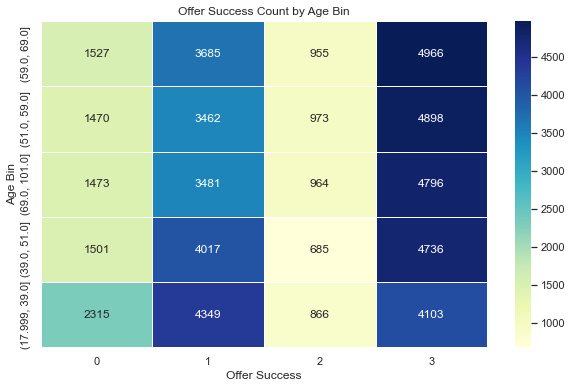

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(color_codes=True)

# potential_per_age = pd.pivot_table(data = final_df[final_df['offer success'] == 3], columns = 'offer success', index = 'age_bin', values = 'income', aggfunc = 'count', fill_value = 0).reset_index()

per_age_success = final_df.groupby(['age_bin', 'offer success'])['offer success'].count().unstack().fillna(0).sort_values(by = 3, ascending = False)

# potential_per_age = final_df.groupby('age_bin','offer success')[['offer success']].count()/final_df.shape[0]
per_age_success
# gen_diff_age = full_df[full_df['offer success'] == 3].groupby('gender')[['reward','difficulty']].mean().sort_values(by = 'gender')
plt.figure(figsize=(10, 6))
sns.heatmap(per_age_success, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Offer Success Count by Age Bin')
plt.xlabel('Offer Success')
plt.ylabel('Age Bin')
plt.show()

Gender and offer sucess

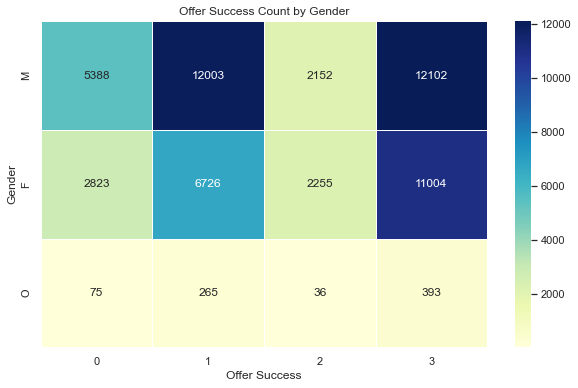

In [139]:
per_gender_success = final_df.groupby(['gender', 'offer success'])['offer success'].count().unstack().fillna(0).sort_values(by = 3, ascending = False)
plt.figure(figsize=(10, 6))
sns.heatmap(per_gender_success, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Offer Success Count by Gender')
plt.xlabel('Offer Success')
plt.ylabel('Gender')
plt.show()

Checking whether income value makes a diffrance

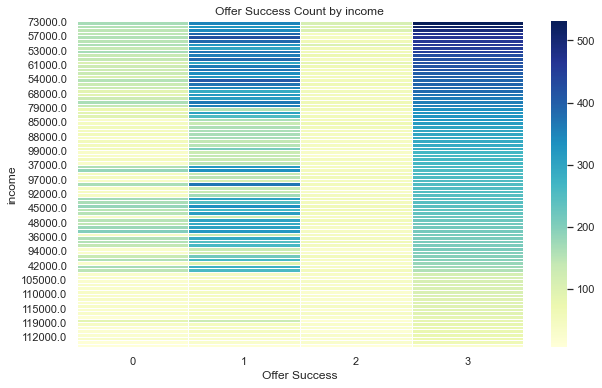

In [140]:
per_reward_success = final_df.groupby(['income', 'offer success'])['offer success'].count().unstack().fillna(0).sort_values(by = 3, ascending = False)
plt.figure(figsize=(10, 6))
sns.heatmap(per_reward_success, annot=False, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Offer Success Count by income')
plt.xlabel('Offer Success')
plt.ylabel('income')
plt.show()

## Modelling

now we need to prepare the dataframe for modeling, the dataframe will only include 'membership_years', 'income', 'age', 'gender', 'offer_success', 'offer_id' as they represent the required labels and target values

In [141]:
df_model = final_df[['months_since_joined', 'income', 'age', 'gender', 'offer success', 'offer_#']]
df_model

months_since_joined   income  age gender  offer success   offer_#
0                       86  84000.0   68      F              0  offer_#1
1                       85  71000.0   56      F              3  offer_#1
2                       71  64000.0   28      M              1  offer_#1
3                       85  66000.0   37      M              1  offer_#1
4                       67  71000.0   52      F              3  offer_#1
...                    ...      ...  ...    ...            ...       ...
55217                   70  51000.0   68      M              3  offer_#6
55218                   77  58000.0   42      F              3  offer_#6
55219                  112  33000.0   51      M              0  offer_#6
55220                   87  58000.0   55      F              3  offer_#6
55221                   91  46000.0   89      M              3  offer_#6

[55222 rows x 6 columns]

for offer to be successfull it needs to be 2 or 3, so we will remap the values as follows

In [142]:
df_model['success'] = df_model['offer success'].map({ 2 : 1, 3 : 1 , 1 : 0 , 0 : 0})
df_model.success.value_counts()

/var/folders/s5/nzk4pjjj57l2jypmdp9wzv_r0000gn/T/ipykernel_41615/1147097580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['success'] = df_model['offer success'].map({ 2 : 1, 3 : 1 , 1 : 0 , 0 : 0})


1    27942
0    27280
Name: success, dtype: int64

Now we need to expand the dataframe.

In [143]:
df_model_expanded = pd.pivot_table(data = df_model, columns = 'offer_#', index = ['months_since_joined', 'income', 'age', 'gender'], values = 'success', aggfunc = 'max', fill_value = 0).reset_index()

df_model_expanded

offer_#  months_since_joined   income  age gender  offer_#1  offer_#10  \
0                         62  30000.0   19      M         0          0   
1                         62  30000.0   42      M         0          0   
2                         62  30000.0   79      M         0          0   
3                         62  31000.0   31      M         0          0   
4                         62  31000.0   33      M         0          1   
...                      ...      ...  ...    ...       ...        ...   
14397                    122  86000.0   43      M         0          1   
14398                    122  93000.0   60      M         0          1   
14399                    122  94000.0   52      M         0          0   
14400                    122  97000.0   67      M         0          1   
14401                    122  98000.0   65      F         0          1   

offer_#  offer_#2  offer_#3  offer_#4  offer_#5  offer_#6  offer_#7  offer_#8  \
0               0         0         0         0         1         1         0   
1               0         0         0         0         0         1         0   
2               0         0         1         0         0         0         0   
3               0         0         0         0         0         0         0   
4               0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
14397           0         0         1         0         1         1         0   
14398           0         0         1         0         1         0         0   
14399           1         0         0         1         0         1         0   
14400           0         0         0         0         1         0         0   
14401           0         0         0         1         0         0         0   

offer_#  offer_#9  
0               0  
1               0  
2               1  
3               0  
4               0  
...           ...  
14397           1  
14398           0  
14399           0  
14400           0  
14401           0  

[14402 rows x 14 columns]

In [144]:
df_model_expanded.describe(include='all')

offer_#  months_since_joined         income           age gender  \
count           14402.000000   14402.000000  14402.000000  14402   
unique                   NaN            NaN           NaN      3   
top                      NaN            NaN           NaN      M   
freq                     NaN            NaN           NaN   8197   
mean               79.159492   65509.443133     54.446952    NaN   
std                14.033169   21656.587733     17.445032    NaN   
min                62.000000   30000.000000     18.000000    NaN   
25%                69.000000   49000.000000     42.000000    NaN   
50%                74.000000   64000.000000     55.000000    NaN   
75%                88.000000   80000.000000     67.000000    NaN   
max               122.000000  120000.000000    101.000000    NaN   

offer_#      offer_#1     offer_#10      offer_#2  offer_#3      offer_#4  \
count    14402.000000  14402.000000  14402.000000   14402.0  14402.000000   
unique            NaN           NaN           NaN       NaN           NaN   
top               NaN           NaN           NaN       NaN           NaN   
freq              NaN           NaN           NaN       NaN           NaN   
mean         0.217192      0.233787      0.198445       0.0      0.249965   
std          0.412349      0.423253      0.398843       0.0      0.433008   
min          0.000000      0.000000      0.000000       0.0      0.000000   
25%          0.000000      0.000000      0.000000       0.0      0.000000   
50%          0.000000      0.000000      0.000000       0.0      0.000000   
75%          0.000000      0.000000      0.000000       0.0      0.000000   
max          1.000000      1.000000      1.000000       0.0      1.000000   

offer_#      offer_#5      offer_#6      offer_#7  offer_#8      offer_#9  
count    14402.000000  14402.000000  14402.000000   14402.0  14402.000000  
unique            NaN           NaN           NaN       NaN           NaN  
top               NaN           NaN           NaN       NaN           NaN  
freq              NaN           NaN           NaN       NaN           NaN  
mean         0.203444      0.287391      0.292945       0.0      0.245174  
std          0.402574      0.452561      0.455129       0.0      0.430205  
min          0.000000      0.000000      0.000000       0.0      0.000000  
25%          0.000000      0.000000      0.000000       0.0      0.000000  
50%          0.000000      0.000000      0.000000       0.0      0.000000  
75%          0.000000      1.000000      1.000000       0.0      0.000000  
max          1.000000      1.000000      1.000000       0.0      1.000000

we have an issue here in the age col, the col contains categrioal values 

In [145]:
df_model_expanded['gender'].value_counts()

M    8197
F    5993
O     212
Name: gender, dtype: int64

In [146]:
# chnage to numrical values 
df_model_expanded['gender_new'] = df_model['gender'].map({ '0': 0, 'M' : 1, 'F' : 2})
df_model_expanded

offer_#  months_since_joined   income  age gender  offer_#1  offer_#10  \
0                         62  30000.0   19      M         0          0   
1                         62  30000.0   42      M         0          0   
2                         62  30000.0   79      M         0          0   
3                         62  31000.0   31      M         0          0   
4                         62  31000.0   33      M         0          1   
...                      ...      ...  ...    ...       ...        ...   
14397                    122  86000.0   43      M         0          1   
14398                    122  93000.0   60      M         0          1   
14399                    122  94000.0   52      M         0          0   
14400                    122  97000.0   67      M         0          1   
14401                    122  98000.0   65      F         0          1   

offer_#  offer_#2  offer_#3  offer_#4  offer_#5  offer_#6  offer_#7  offer_#8  \
0               0         0         0         0         1         1         0   
1               0         0         0         0         0         1         0   
2               0         0         1         0         0         0         0   
3               0         0         0         0         0         0         0   
4               0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
14397           0         0         1         0         1         1         0   
14398           0         0         1         0         1         0         0   
14399           1         0         0         1         0         1         0   
14400           0         0         0         0         1         0         0   
14401           0         0         0         1         0         0         0   

offer_#  offer_#9  gender_new  
0               0         2.0  
1               0         2.0  
2               1         1.0  
3               0         1.0  
4               0         2.0  
...           ...         ...  
14397           1         2.0  
14398           0         NaN  
14399           0         1.0  
14400           0         2.0  
14401           0         2.0  

[14402 rows x 15 columns]

remove gender colmun as it is not needed anymore

In [147]:
df_model_expanded.drop(columns = ['gender'], inplace = True)

In [148]:
# we need to check of we have any NaNs
df_model_expanded.isnull().values.any()

True

In [149]:
df_model_expanded.isnull().sum().sum()

202

In [150]:
np.sum(df_model_expanded.isnull()) 

offer_#
months_since_joined      0
income                   0
age                      0
offer_#1                 0
offer_#10                0
offer_#2                 0
offer_#3                 0
offer_#4                 0
offer_#5                 0
offer_#6                 0
offer_#7                 0
offer_#8                 0
offer_#9                 0
gender_new             202
dtype: int64

we can see that we have another issue here, that we have NaNs in the newly created col

In [151]:
df_model_expanded.dropna()

offer_#  months_since_joined   income  age  offer_#1  offer_#10  offer_#2  \
0                         62  30000.0   19         0          0         0   
1                         62  30000.0   42         0          0         0   
2                         62  30000.0   79         0          0         0   
3                         62  31000.0   31         0          0         0   
4                         62  31000.0   33         0          1         0   
...                      ...      ...  ...       ...        ...       ...   
14396                    122  81000.0   78         0          0         0   
14397                    122  86000.0   43         0          1         0   
14399                    122  94000.0   52         0          0         1   
14400                    122  97000.0   67         0          1         0   
14401                    122  98000.0   65         0          1         0   

offer_#  offer_#3  offer_#4  offer_#5  offer_#6  offer_#7  offer_#8  offer_#9  \
0               0         0         0         1         1         0         0   
1               0         0         0         0         1         0         0   
2               0         1         0         0         0         0         1   
3               0         0         0         0         0         0         0   
4               0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
14396           0         1         0         1         1         0         0   
14397           0         1         0         1         1         0         1   
14399           0         0         1         0         1         0         0   
14400           0         0         0         1         0         0         0   
14401           0         0         1         0         0         0         0   

offer_#  gender_new  
0               2.0  
1               2.0  
2               1.0  
3               1.0  
4               2.0  
...             ...  
14396           1.0  
14397           2.0  
14399           1.0  
14400           2.0  
14401           2.0  

[14200 rows x 14 columns]

to ensure that the dataframe is ready we will remove any rows from the DataFrame that contain infinite or NaN values

In [152]:
df_model_new = df_model_expanded[np.isfinite(df_model_expanded).all(1)]
df_model_new 

offer_#  months_since_joined   income  age  offer_#1  offer_#10  offer_#2  \
0                         62  30000.0   19         0          0         0   
1                         62  30000.0   42         0          0         0   
2                         62  30000.0   79         0          0         0   
3                         62  31000.0   31         0          0         0   
4                         62  31000.0   33         0          1         0   
...                      ...      ...  ...       ...        ...       ...   
14396                    122  81000.0   78         0          0         0   
14397                    122  86000.0   43         0          1         0   
14399                    122  94000.0   52         0          0         1   
14400                    122  97000.0   67         0          1         0   
14401                    122  98000.0   65         0          1         0   

offer_#  offer_#3  offer_#4  offer_#5  offer_#6  offer_#7  offer_#8  offer_#9  \
0               0         0         0         1         1         0         0   
1               0         0         0         0         1         0         0   
2               0         1         0         0         0         0         1   
3               0         0         0         0         0         0         0   
4               0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
14396           0         1         0         1         1         0         0   
14397           0         1         0         1         1         0         1   
14399           0         0         1         0         1         0         0   
14400           0         0         0         1         0         0         0   
14401           0         0         1         0         0         0         0   

offer_#  gender_new  
0               2.0  
1               2.0  
2               1.0  
3               1.0  
4               2.0  
...             ...  
14396           1.0  
14397           2.0  
14399           1.0  
14400           2.0  
14401           2.0  

[14200 rows x 14 columns]

The objective here is how the offers will be successfull, so we will build a pipeline that how likely the offer will be a sucess using multi-output classification on the random forset 

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split


pipeline = Pipeline([
        ('imp', SimpleImputer(strategy = 'most_frequent')),
        ('scaler', StandardScaler()),
        ('clf', MultiOutputClassifier(RandomForestClassifier()))
    ])

X = df_model_new[['months_since_joined', 'income', 'age', 'gender_new']]
y = df_model_new.iloc[:, -11:-1]
y

offer_#  offer_#1  offer_#10  offer_#2  offer_#3  offer_#4  offer_#5  \
0               0          0         0         0         0         0   
1               0          0         0         0         0         0   
2               0          0         0         0         1         0   
3               0          0         0         0         0         0   
4               0          1         0         0         0         0   
...           ...        ...       ...       ...       ...       ...   
14396           0          0         0         0         1         0   
14397           0          1         0         0         1         0   
14399           0          0         1         0         0         1   
14400           0          1         0         0         0         0   
14401           0          1         0         0         0         1   

offer_#  offer_#6  offer_#7  offer_#8  offer_#9  
0               1         1         0         0  
1               0         1         0         0  
2               0         0         0         1  
3               0         0         0         0  
4               0         0         0         0  
...           ...       ...       ...       ...  
14396           1         1         0         0  
14397           1         1         0         1  
14399           0         1         0         0  
14400           1         0         0         0  
14401           0         0         0         0  

[14200 rows x 10 columns]

In [154]:
np.sum(df_model_new.isnull()) 

offer_#
months_since_joined    0
income                 0
age                    0
offer_#1               0
offer_#10              0
offer_#2               0
offer_#3               0
offer_#4               0
offer_#5               0
offer_#6               0
offer_#7               0
offer_#8               0
offer_#9               0
gender_new             0
dtype: int64

Spilt the data into training and test, then train the model 

In [155]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

now let us evalaute the model

In [156]:
offers_numbers = y.columns
offers_numbers

Index(['offer_#1', 'offer_#10', 'offer_#2', 'offer_#3', 'offer_#4', 'offer_#5',
       'offer_#6', 'offer_#7', 'offer_#8', 'offer_#9'],
      dtype='object', name='offer_#')

In [157]:

from sklearn.metrics import classification_report
y_preds = pipeline.predict(X_test)

i = 0;
for c in offers_numbers:
        
        print(c)
        print(classification_report(y_test.iloc[:,i],y_preds[:,i]))
        i = i + 1
        
    

offer_#1
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2820
           1       0.28      0.12      0.17       730

    accuracy                           0.75      3550
   macro avg       0.54      0.52      0.51      3550
weighted avg       0.69      0.75      0.71      3550

offer_#10
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      2730
           1       0.27      0.10      0.14       820

    accuracy                           0.73      3550
   macro avg       0.52      0.51      0.49      3550
weighted avg       0.66      0.73      0.68      3550

offer_#2
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2825
           1       0.28      0.10      0.15       725

    accuracy                           0.76      3550
   macro avg       0.54      0.52      0.51      3550
weighted avg       0.70      0.76      0.72   

### Hyperparameter Tuning

Let us have summary of the accuracy 

In [170]:
from sklearn.metrics import accuracy_score
rf = {name: accuracy_score(y_test[name], y_preds[:, i]) for i, name in enumerate(y_test)}
rf_df = pd.DataFrame.from_dict(rf, orient = 'index')
rf_df.rename(columns = {0: 'RF'}, inplace = True)
rf_df

RF
offer_#1   0.754366
offer_#10  0.729014
offer_#2   0.763944
offer_#3   1.000000
offer_#4   0.699155
offer_#5   0.758028
offer_#6   0.654648
offer_#7   0.655211
offer_#8   1.000000
offer_#9   0.719718

let us try to enhance the accuracy

In [162]:
pipeline.get_params()

{'memory': None,
 'steps': [('imp', SimpleImputer(strategy='most_frequent')),
  ('scaler', StandardScaler()),
  ('clf', MultiOutputClassifier(estimator=RandomForestClassifier()))],
 'verbose': False,
 'imp': SimpleImputer(strategy='most_frequent'),
 'scaler': StandardScaler(),
 'clf': MultiOutputClassifier(estimator=RandomForestClassifier()),
 'imp__add_indicator': False,
 'imp__copy': True,
 'imp__fill_value': None,
 'imp__missing_values': nan,
 'imp__strategy': 'most_frequent',
 'imp__verbose': 0,
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'clf__estimator__bootstrap': True,
 'clf__estimator__ccp_alpha': 0.0,
 'clf__estimator__class_weight': None,
 'clf__estimator__criterion': 'gini',
 'clf__estimator__max_depth': None,
 'clf__estimator__max_features': 'auto',
 'clf__estimator__max_leaf_nodes': None,
 'clf__estimator__max_samples': None,
 'clf__estimator__min_impurity_decrease': 0.0,
 'clf__estimator__min_impurity_split': None,
 'clf__estimator__min

In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'imp__strategy': ['mean', 'median', 'most_frequent'],  
  'clf__estimator__n_estimators': [50, 100, 150],         
  'clf__estimator__max_depth': [None, 10, 20],           
  'clf__estimator__min_samples_split': [2, 5, 10],        
  'clf__estimator__min_samples_leaf': [1, 2, 4]       
}

cv = GridSearchCV(pipeline, param_grid=param_grid, cv=3, n_jobs=-1)

cv.fit(X_train, y_train)

y_preds_tuned = cv.predict(X_test)

In [168]:
cv_results = cv.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Mean CV Score:", mean_score, "for Params:", params)

Mean CV Score: 0.1396244131455399 for Params: {'clf__estimator__max_depth': None, 'clf__estimator__min_samples_leaf': 1, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 50, 'imp__strategy': 'mean'}
Mean CV Score: 0.1415962441314554 for Params: {'clf__estimator__max_depth': None, 'clf__estimator__min_samples_leaf': 1, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 50, 'imp__strategy': 'median'}
Mean CV Score: 0.13953051643192488 for Params: {'clf__estimator__max_depth': None, 'clf__estimator__min_samples_leaf': 1, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 50, 'imp__strategy': 'most_frequent'}
Mean CV Score: 0.14037558685446008 for Params: {'clf__estimator__max_depth': None, 'clf__estimator__min_samples_leaf': 1, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 100, 'imp__strategy': 'mean'}
Mean CV Score: 0.1419718309859155 for Params: {'clf__estimator__max_depth': None, 'clf__estimator_

Print the best paramaters 

In [169]:
best_params = cv.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'clf__estimator__max_depth': 10, 'clf__estimator__min_samples_leaf': 4, 'clf__estimator__min_samples_split': 5, 'clf__estimator__n_estimators': 100, 'imp__strategy': 'median'}


Let us see the improvemnt in comparsion with the perviuos results

In [171]:
rf_tuned = {name: accuracy_score(y_test[name], y_preds[:, i]) for i, name in enumerate(y_test)}
rf_tuned = pd.DataFrame.from_dict(rf_tuned, orient = 'index')
rf_tuned['RF_Tuned'] = [accuracy_score(y_test[name], y_preds_tuned[:, i]) for i, name in enumerate(y_test)]
rf_tuned.rename(columns = {0: 'RF'}, inplace = True)

rf_tuned

RF  RF_Tuned
offer_#1   0.754366  0.794085
offer_#10  0.729014  0.768451
offer_#2   0.763944  0.793803
offer_#3   1.000000  1.000000
offer_#4   0.699155  0.744507
offer_#5   0.758028  0.797746
offer_#6   0.654648  0.713239
offer_#7   0.655211  0.705352
offer_#8   1.000000  1.000000
offer_#9   0.719718  0.760563